In [ ]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import preprocessing
#!pip install catboost
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import sklearn.model_selection as ms
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
def fill_missing_values(data):
    
    '''
    Function to input missing values based on the column object type
    '''
    
    cols = list(data.columns)
    for col in cols:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        
            data[col] = data[col].fillna(data[col].mean())
        
        #elif data[col].dtype == 'O' or data[col].dtype == 'object':
        #    data[col] = data[col].fillna(data[col].mode()[0])
            
        else:
            data[col] = data[col].fillna(data[col].mode()[0])
            
    return data
 
def one_hot_encoding(traindata, *args):
    
    for ii in args:
        traindata = pd.get_dummies(traindata, prefix=[ii], columns=[ii])
        
    return traindata
 
def drop_columns(traindata, *args):
    
    #labels = np.array(traindata[target])
    
    columns = []
    for _ in args:
        columns.append(_)
        
    traindata = traindata.drop(columns, axis=1)
    #traindata = traindata.drop(target, axis=1)
    #testdata = testdata.drop(columns, axis=1)
        
    return traindata
 
def process(traindata):
    
    cols = list(traindata.columns)
    for _ in cols:
        traindata[_] = np.where(traindata[_] == np.inf, -999, traindata[_])
        traindata[_] = np.where(traindata[_] == np.nan, -999, traindata[_])
        traindata[_] = np.where(traindata[_] == -np.inf, -999, traindata[_])
        
    return traindata
 
def show_evaluation(pred, true):
  print(f'Default score: {score(true.values, pred)}')
  print(f'Accuracy is: {accuracy_score(true, pred)}')
  print(f'F1 is: {f1_score(pred, true.values, average="weighted")}')
 
def freq_encode(data, cols):
    for i in cols:
        encoding = data.groupby(i).size()
        encoding = encoding/len(data)
        data[i + '_enc'] = data[i].map(encoding)
    return data
 
 
def mean_target(data, cols):
    kf = KFold(5)
    a = pd.DataFrame()
    for tr_ind, val_ind in kf.split(data):
        X_tr, X_val= data.iloc[tr_ind].copy(), data.iloc[val_ind].copy()
        for col in cols:
            means = X_val[col].map(X_tr.groupby(col).FORCE_2020_LITHOFACIES_LITHOLOGY.mean())
            X_val[col + '_mean_target'] = means + 0.0001
        a = pd.concat((a, X_val))
    #prior = FORCE_2020_LITHOFACIES_LITHOLOGY.mean()
    #a.fillna(prior, inplace=True)
    return a
 
def make_submission(prediction, filename):
 
  path = '/content/drive/My Drive/FORCE-Lithology-Prediction/'
 
  test = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/Test.csv', sep=';')
  #test_prediction = model.predict(testdata)
 
  #test_prediction
  category_to_lithology = {y:x for x,y in lithology_numbers.items()}
  test_prediction_for_submission = np.vectorize(category_to_lithology.get)(prediction)
  np.savetxt(path+filename+'.csv', test_prediction_for_submission, header='lithology', fmt='%i')

In [ ]:
A = np.load('/content/drive/My Drive/FORCE-Lithology-Prediction/penalty_matrix.npy')
 
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]
 
def evaluate(model):
    feat_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)
    plt.figure(figsize=(24,8))
    feat_imp.plot(kind='bar', title=f'Feature Importances {len(model.feature_importances_)}')
    plt.ylabel('Feature Importance Score')

In [ ]:
#importing files
train = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/new_train.csv')
#df5 = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/df5.csv')
test = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/Test.csv', sep=';')
#valid1 = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/validation1.csv')
#valid2 = pd.read_csv('/content/drive/My Drive/FORCE-Lithology-Prediction/validation2.csv')
 
ntrain = train.shape[0]
ntest = test.shape[0]
nvalid1 = valid1.shape[0]
nvalid2 = valid2.shape[0]
target = train.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
df = pd.concat((train, test, valid1, valid2)).reset_index(drop=True)

NameError: ignored

In [ ]:
test.shape, df.shape, train.shape, valid1.shape, valid2.shape

((136786, 27), (1307297, 29), (977670, 29), (101331, 29), (91510, 29))

In [ ]:
train_HORD = train.loc[train.GROUP == 'HORDALAND GP.'] 
train_SHET = train.loc[train.GROUP == 'SHETLAND GP.'] 
train_VIKING = train.loc[train.GROUP == 'VIKING GP.'] 
train_ROGALAND = train.loc[train.GROUP == 'ROGALAND GP.'] 
train_DUNLIN = train.loc[train.GROUP == 'DUNLIN GP.'] 
train_NORDLAND = train.loc[train.GROUP == 'NORDLAND GP.'] 
train_CROMER = train.loc[train.GROUP == 'CROMER KNOLL GP.'] 
train_BAAT = train.loc[train.GROUP == 'BAAT GP.'] 
train_VESTLAND = train.loc[train.GROUP == 'VESTLAND GP.'] 
train_HEGRE = train.loc[train.GROUP == 'HEGRE GP.'] 

In [ ]:
lithology = train['FORCE_2020_LITHOFACIES_LITHOLOGY']
valid1_lithology = valid1['FORCE_2020_LITHOFACIES_LITHOLOGY']
valid2_lithology = valid2['FORCE_2020_LITHOFACIES_LITHOLOGY']
 
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}
 
lithology = lithology.map(lithology_numbers)
valid1_lithology = valid1_lithology.map(lithology_numbers)
valid2_lithology = valid2_lithology.map(lithology_numbers)

NameError: ignored

In [ ]:
valid1.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()

65000    58959
30000    17968
65030    12800
70000     7348
80000     2693
90000      795
99000      619
74000      149
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [ ]:
valid1.shape, valid2.shape, train.shape, test.shape

((101331, 29), (91510, 29), (977670, 29), (136786, 27))

In [ ]:
(df.isna().sum()/df.shape[0]) * 100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.828733
Y_LOC                                 0.828733
Z_LOC                                 0.828733
GROUP                                 0.097759
FORMATION                            11.020296
CALI                                  7.153845
RSHA                                 48.768566
RMED                                  3.027621
RDEP                                  0.847091
RHOB                                 13.633398
GR                                    0.000000
SGR                                  94.694932
NPHI                                 33.492389
PEF                                  39.937520
DTC                                   6.248465
SP                                   28.793992
BS                                   42.658707
ROP                                  53.844689
DTS                                  83.337145
DCAL         

In [ ]:
print(df.shape)
cols = ['FORCE_2020_LITHOFACIES_CONFIDENCE', 'SGR', 
        'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']
df = drop_columns(df, *cols)
print(df.shape)

(1307297, 29)
(1307297, 21)


In [ ]:
valid1 = drop_columns(valid1, *cols)
valid2 = drop_columns(valid2, *cols)
print(valid1.shape, valid2.shape)

(97018, 21) (90268, 21)


In [ ]:
df = freq_encode(df, ['FORMATION', 'WELL', 'GROUP'])
print(df.shape)
df = mean_target(df, ['FORMATION', 'WELL', 'GROUP'])
df.shape

(1307297, 24)


(1307297, 27)

In [ ]:
valid1 = freq_encode(valid1, ['FORMATION', 'WELL', 'GROUP'])
valid1 = mean_target(valid1, ['FORMATION', 'WELL', 'GROUP'])
valid2 = freq_encode(valid2, ['FORMATION', 'WELL', 'GROUP'])
valid2 = mean_target(valid2, ['FORMATION', 'WELL', 'GROUP'])
valid1.shape, valid2.shape

((97018, 27), (90268, 27))

In [ ]:
valid1 = valid1.drop(['WELL', 'FORMATION'], axis=1)
valid1.shape

valid1 = valid1.fillna(-999)
valid1 = process(valid1)

valid2 = valid2.drop(['WELL', 'FORMATION'], axis=1)
valid2.shape

valid2 = valid2.fillna(-999)
valid2 = process(valid2)

In [ ]:
col = ['GROUP']

df = one_hot_encoding(df, *col)
df.shape

(1307297, 40)

In [ ]:
valid1_target = valid1.FORCE_2020_LITHOFACIES_LITHOLOGY
valid2_target = valid2.FORCE_2020_LITHOFACIES_LITHOLOGY

valid1.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1, inplace=True)
valid2.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1, inplace=True)

In [ ]:
valid1_target = valid1_target.map(lithology_numbers)
valid2_target = valid2_target.map(lithology_numbers)

In [ ]:
#valid1.drop('GROUP', axis=1, inplace=True)
#valid2.drop('GROUP', axis=1, inplace=True)

In [ ]:
#df = df.drop(['WELL', 'FORMATION'], axis=1)
#df.shape

#df = df.fillna(-999)
#df = process(df)
data = df.copy()

train2 = data[:ntrain].copy()
target = train2.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
validation1_target = valid1.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
validation2_target = valid2.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
train2.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)

test2 = data[ntrain:(ntest+ntrain)].copy()
test2.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)
test2 = test2.reset_index(drop=True)

validation1 = data[(ntest+ntrain):(ntest+ntrain+nvalid1)].copy()
validation1.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)
validation1 = validation1.reset_index(drop=True)

validation2 = data[(ntrain+ntest+nvalid1):].copy()
validation2.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)
validation2 = validation2.reset_index(drop=True)

print(train2.shape, test2.shape, validation1.shape, valid1.shape, validation2.shape, valid2.shape)

(977670, 37) (136786, 37) (101331, 37) (101331, 29) (91510, 37) (91510, 29)


In [ ]:
traindata = train2
testdata = test2

In [ ]:
print(train2.shape, test2.shape, validation1.shape, valid1.shape, validation2.shape, valid2.shape)

(977670, 38) (136786, 37) (101331, 37) (101331, 29) (91510, 37) (91510, 29)


In [ ]:
train_HORD = traindata.loc[train.GROUP == 'HORDALAND GP.'] 
train_SHET = traindata.loc[train.GROUP == 'SHETLAND GP.'] 
train_VIKING = traindata.loc[train.GROUP == 'VIKING GP.'] 
train_ROGALAND = traindata.loc[train.GROUP == 'ROGALAND GP.'] 
train_DUNLIN = traindata.loc[train.GROUP == 'DUNLIN GP.'] 
train_NORDLAND = traindata.loc[train.GROUP == 'NORDLAND GP.'] 
train_CROMER = traindata.loc[train.GROUP == 'CROMER KNOLL GP.'] 
train_BAAT = traindata.loc[train.GROUP == 'BAAT GP.'] 
train_VESTLAND = traindata.loc[train.GROUP == 'VESTLAND GP.'] 
train_HEGRE = traindata.loc[train.GROUP == 'HEGRE GP.'] 

In [ ]:
traindata = traindata.drop('GROUP', axis=1)

In [ ]:
testdata = testdata.drop('GROUP', axis=1)
traindata.shape, testdata.shape

((977670, 24), (136786, 23))

In [ ]:
traindata.shape, testdata.shape, valid1.shape, valid2.shape

((977670, 38), (136786, 37), (97018, 34), (90268, 34))

In [ ]:
scaler = preprocessing.StandardScaler().fit(traindata)
def scale_data(data):
  
  data = scaler.transform(data)
  #testdata = scaler.transform(testdata)
  data = pd.DataFrame(data, columns=testdata.columns)

  return data

In [ ]:
traindata

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORMATION_enc,WELL_enc,GROUP_enc,FORMATION_mean_target,WELL_mean_target,GROUP_mean_target,GROUP_BAAT GP.,GROUP_BOKNFJORD GP.,GROUP_CROMER KNOLL GP.,GROUP_DUNLIN GP.,GROUP_HEGRE GP.,GROUP_HORDALAND GP.,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,-999.0,20.915468,161.131180,24.612379,-999.0,34.636410,-0.574928,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,-999.0,19.383013,160.603470,23.895531,-999.0,34.636410,-0.570188,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,-999.0,22.591518,160.173615,23.916357,-999.0,34.779556,-0.574245,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,-999.0,32.191910,160.149429,23.793688,-999.0,39.965164,-0.586315,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,-999.0,38.495632,160.128342,24.104078,-999.0,57.483765,-0.597914,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977665,3169.3124,-999.00000,-999.0,-999.000000,8.423170,-999.0,-999.000000,-999.000000,2.527984,77.654900,-999.0,4.586425,-999.000000,-999.000000,8.5,27.674368,-0.001763,30000.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561,0,0,0,0,0,0,0,0,0,0,0,1,0,0
977666,3169.4644,-999.00000,-999.0,-999.000000,8.379244,-999.0,-999.000000,-999.000000,2.537613,75.363937,-999.0,7.019858,-999.000000,-999.000000,8.5,28.024338,-0.007600,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561,0,0,0,0,0,0,0,0,0,0,0,1,0,0
977667,3169.6164,-999.00000,-999.0,-999.000000,8.350248,-999.0,-999.000000,-999.000000,2.491860,66.452843,-999.0,9.049782,-999.000000,-999.000000,8.5,28.091282,-0.018297,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561,0,0,0,0,0,0,0,0,0,0,0,1,0,0
977668,3169.7684,-999.00000,-999.0,-999.000000,8.313779,-999.0,-999.000000,-999.000000,2.447539,55.784817,-999.0,8.903917,-999.000000,-999.000000,8.5,28.019775,-0.011438,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
valid2

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORMATION_enc,WELL_enc,GROUP_enc,FORMATION_mean_target,WELL_mean_target,GROUP_mean_target,GROUP_-999,GROUP_BAAT GP.,GROUP_CROMER KNOLL GP.,GROUP_DUNLIN GP.,GROUP_HEGRE GP.,GROUP_HORDALAND GP.,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_SHETLAND GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.
0,256.922400,497437.37500,6728312.0,-231.922302,21.149618,1.837429,1.539432,2.216752,-999.000000,53.602756,-999.000000,-999.0,166.110474,43.475624,-999.0,98.551178,-999.000000,-999.000000,0.239686,0.094541,-999.0,54312.169279,54139.153444,0,0,0,0,0,0,1,0,0,0,0
1,257.074400,497437.37500,6728312.0,-232.074310,20.023129,1.950167,1.608084,2.211968,-999.000000,58.111530,-999.000000,-999.0,166.081924,45.057995,-999.0,57.606297,-999.000000,-999.000000,0.239686,0.094541,-999.0,54312.169279,54139.153444,0,0,0,0,0,0,1,0,0,0,0
2,257.226400,497437.37500,6728312.0,-232.226303,17.702616,2.133782,1.667697,2.222546,-999.000000,62.285587,-999.000000,-999.0,166.067062,46.048992,-999.0,213.779495,-999.000000,-999.000000,0.239686,0.094541,-999.0,54312.169279,54139.153444,0,0,0,0,0,0,1,0,0,0,0
3,257.378400,497437.37500,6728312.0,-232.378311,16.079689,2.224826,1.712445,2.275805,-999.000000,63.438637,-999.000000,-999.0,166.055740,44.212708,-999.0,190.913376,-999.000000,-999.000000,0.239686,0.094541,-999.0,54312.169279,54139.153444,0,0,0,0,0,0,1,0,0,0,0
4,257.530400,497437.37500,6728312.0,-232.530304,14.906407,2.308409,1.786179,2.339774,-999.000000,62.913967,-999.000000,-999.0,166.084229,52.086094,-999.0,85.149597,-999.000000,-999.000000,0.239686,0.094541,-999.0,54312.169279,54139.153444,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90263,4349.302805,454469.53125,6603730.0,-4324.002930,7.986266,-999.000000,6.865710,7.329883,2.656386,47.279427,0.031128,-999.0,-999.000000,-999.000000,8.5,-999.000000,-0.005611,0.010425,0.254852,0.124319,-999.0,57967.942346,55395.361445,0,0,0,1,0,0,0,0,0,0,0
90264,4349.454805,454469.53125,6603730.0,-4324.154785,7.989600,-999.000000,7.297952,7.310992,2.654442,49.578907,0.053722,-999.0,-999.000000,-999.000000,8.5,-999.000000,-0.007099,0.010425,0.254852,0.124319,-999.0,57967.942346,55395.361445,0,0,0,1,0,0,0,0,0,0,0
90265,4349.606805,454469.53125,6603730.0,-4324.307129,7.992951,-999.000000,7.716913,7.337108,2.651517,51.294518,0.067052,-999.0,-999.000000,-999.000000,8.5,-999.000000,-0.010797,0.010425,0.254852,0.124319,-999.0,57967.942346,55395.361445,0,0,0,1,0,0,0,0,0,0,0
90266,4349.758805,454469.53125,6603730.0,-4324.458984,7.997011,-999.000000,8.330764,7.509970,2.645189,50.539646,0.072980,-999.0,-999.000000,-999.000000,8.5,-999.000000,-0.023914,0.010425,0.254852,0.124319,-999.0,57967.942346,55395.361445,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_HORD_target = train_HORD.FORCE_2020_LITHOFACIES_LITHOLOGY
train_SHET_target = train_SHET.FORCE_2020_LITHOFACIES_LITHOLOGY
train_ROGALAND_target = train_ROGALAND.FORCE_2020_LITHOFACIES_LITHOLOGY
train_VIKING_target = train_VIKING.FORCE_2020_LITHOFACIES_LITHOLOGY
train_DUNLIN_target = train_DUNLIN.FORCE_2020_LITHOFACIES_LITHOLOGY
train_NORDLAND_target = train_NORDLAND.FORCE_2020_LITHOFACIES_LITHOLOGY
train_CROMER_target = train_CROMER.FORCE_2020_LITHOFACIES_LITHOLOGY
train_BAAT_target = train_BAAT.FORCE_2020_LITHOFACIES_LITHOLOGY
train_VESTLAND_target = train_VESTLAND.FORCE_2020_LITHOFACIES_LITHOLOGY
train_HEGRE_target = train_HEGRE.FORCE_2020_LITHOFACIES_LITHOLOGY

In [ ]:
train_HORD_target = train_HORD_target.map(lithology_numbers)
train_SHET_target = train_SHET_target.map(lithology_numbers)
train_ROGALAND_target = train_ROGALAND_target.map(lithology_numbers)
train_VIKING_target = train_VIKING_target.map(lithology_numbers)
train_DUNLIN_target = train_DUNLIN_target.map(lithology_numbers)
train_NORDLAND_target = train_NORDLAND_target.map(lithology_numbers)
train_CROMER_target = train_CROMER_target.map(lithology_numbers)
train_BAAT_target = train_BAAT_target.map(lithology_numbers)
train_VESTLAND_target = train_VESTLAND_target.map(lithology_numbers)
train_HEGRE_target = train_HEGRE_target.map(lithology_numbers)

In [ ]:
train_HORD = train_HORD.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_SHET = train_SHET.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_ROGALAND = train_ROGALAND.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_VIKING = train_VIKING.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_DUNLIN = train_DUNLIN.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_NORDLAND = train_NORDLAND.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_CROMER = train_CROMER.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_BAAT = train_BAAT.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_VESTLAND = train_VESTLAND.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)
train_HEGRE = train_HEGRE.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1)

In [ ]:
train_HORD = scale_data(train_HORD)
train_SHET = scale_data(train_SHET)
train_ROGALAND = scale_data(train_ROGALAND)
train_VIKING = scale_data(train_VIKING)
train_DUNLIN = scale_data(train_DUNLIN)
train_NORDLAND = scale_data(train_NORDLAND)
train_CROMER = scale_data(train_CROMER)
train_BAAT = scale_data(train_BAAT)
train_VESTLAND = scale_data(train_VESTLAND)
train_HEGRE = scale_data(train_HEGRE)

In [ ]:
traindata = scale_data(traindata)
testdata = scale_data(testdata)
validation1 = scale_data(validation1)
validation2 = scale_data(validation2)

In [ ]:
traindata.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1, inplace=True)

In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model.fit(traindata, lithology)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=2,
                       warm_start=False)

In [ ]:
pred1 = model.predict(validation1)
pred2 = model.predict(validation2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


Default score: -0.7816573901372729
Accuracy is: 0.7195527528594409
F1 is: 0.7712288362530723
None
Default score: -1.0265490110370452
Accuracy is: 0.6057042946126107
F1 is: 0.7095512054217591
None


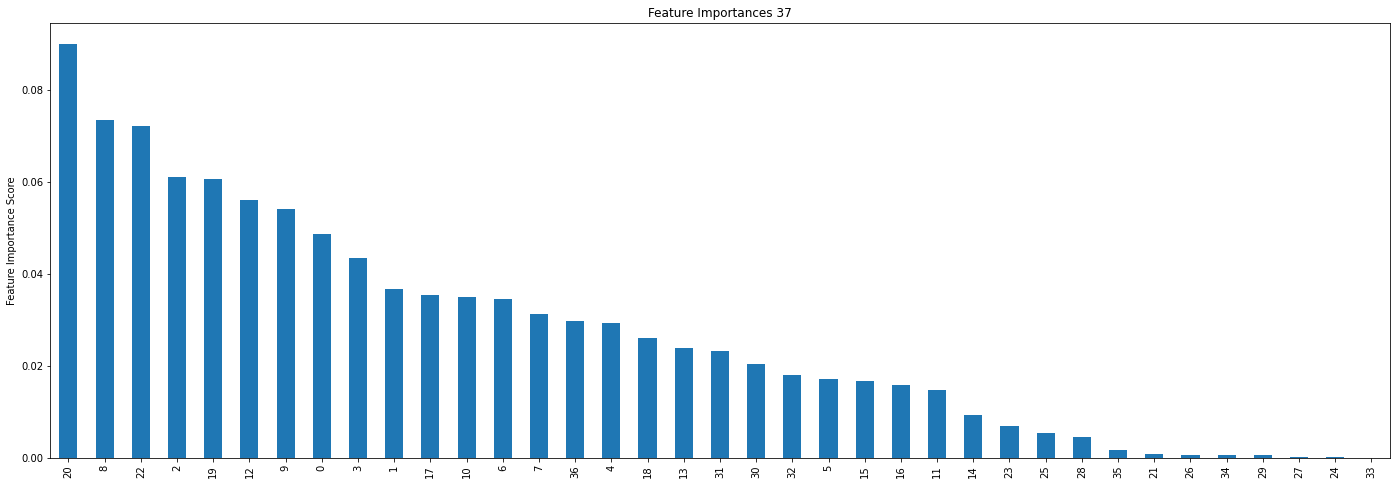

In [ ]:
print(show_evaluation(pred1, valid1_lithology))
print(show_evaluation(pred2, valid2_lithology))
evaluate(model)

In [ ]:
model = ExtraTreesClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model.fit(traindata, lithology)

pred1 = model.predict(validation1)
pred2 = model.predict(validation2)

print(show_evaluation(pred1, valid1_lithology))
print(show_evaluation(pred2, valid2_lithology))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   36.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Default score: -0.7437605471178612
Accuracy is: 0.7369511797969032
F1 is: 0.7786482531019863
None
Default score: -1.12886433176702
Accuracy is: 0.577543437875642
F1 is: 0.6848492356073399
None


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [ ]:
pred_val2 = model2.predict(valid1)
pred_test2 = model2.predict(valid2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [ ]:
x_train, x_test, y_train, y_test = ms.train_test_split(traindata, lithology, test_size=0.2, random_state=42, stratify=lithology)

cat3 = CatBoostClassifier(n_estimators=50000, random_state=566, learning_rate=0.3, max_depth=6,
                                  use_best_model=True, task_type='GPU',
                                  eval_metric='MultiClass', verbose=100, reg_lambda=20)
cat3.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=100, verbose_eval=100)
pred2 = cat3.predict(validation1)
pred_test2 = cat3.predict(validation2)

0:	learn: 1.1396096	test: 1.1412039	best: 1.1412039 (0)	total: 63.7ms	remaining: 53m 3s
100:	learn: 0.3340499	test: 0.3359450	best: 0.3359450 (100)	total: 3.7s	remaining: 30m 27s
200:	learn: 0.2844945	test: 0.2878293	best: 0.2878293 (200)	total: 7.18s	remaining: 29m 39s
300:	learn: 0.2594401	test: 0.2643192	best: 0.2643192 (300)	total: 10.7s	remaining: 29m 27s
400:	learn: 0.2437027	test: 0.2498864	best: 0.2498864 (400)	total: 14.2s	remaining: 29m 12s
500:	learn: 0.2309506	test: 0.2383484	best: 0.2383484 (500)	total: 17.7s	remaining: 29m 6s
600:	learn: 0.2207734	test: 0.2292475	best: 0.2292475 (600)	total: 21.2s	remaining: 29m 2s
700:	learn: 0.2126534	test: 0.2222716	best: 0.2222716 (700)	total: 24.7s	remaining: 28m 59s
800:	learn: 0.2056781	test: 0.2163515	best: 0.2163515 (800)	total: 28.3s	remaining: 28m 56s
900:	learn: 0.1997551	test: 0.2115707	best: 0.2115707 (900)	total: 31.8s	remaining: 28m 53s
1000:	learn: 0.1945055	test: 0.2074679	best: 0.2074679 (1000)	total: 35.3s	remaining: 2

In [ ]:
pred1 = cat3.predict(validation1)
pred2 = cat3.predict(validation2)

print(show_evaluation(pred1, valid1_lithology))
print(show_evaluation(pred2, valid2_lithology))

Default score: [-1.17057465]
Accuracy is: 0.5949610681824911
F1 is: 0.5945539374502371
None
Default score: [-0.93583761]
Accuracy is: 0.6239755218008961
F1 is: 0.6979301291233045
None


In [ ]:
model3 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model3.fit(train_ROGALAND, train_ROGALAND_target)

pred_val3 = model3.predict(valid1)
pred_test3 = model3.predict(valid2)

show_evaluation(pred_test3, valid1_target)
evaluate(model3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


IndexError: ignored

Default score: -1.2265713578923498
Accuracy is: 0.6021872229895483
F1 is: 0.7517064352390939


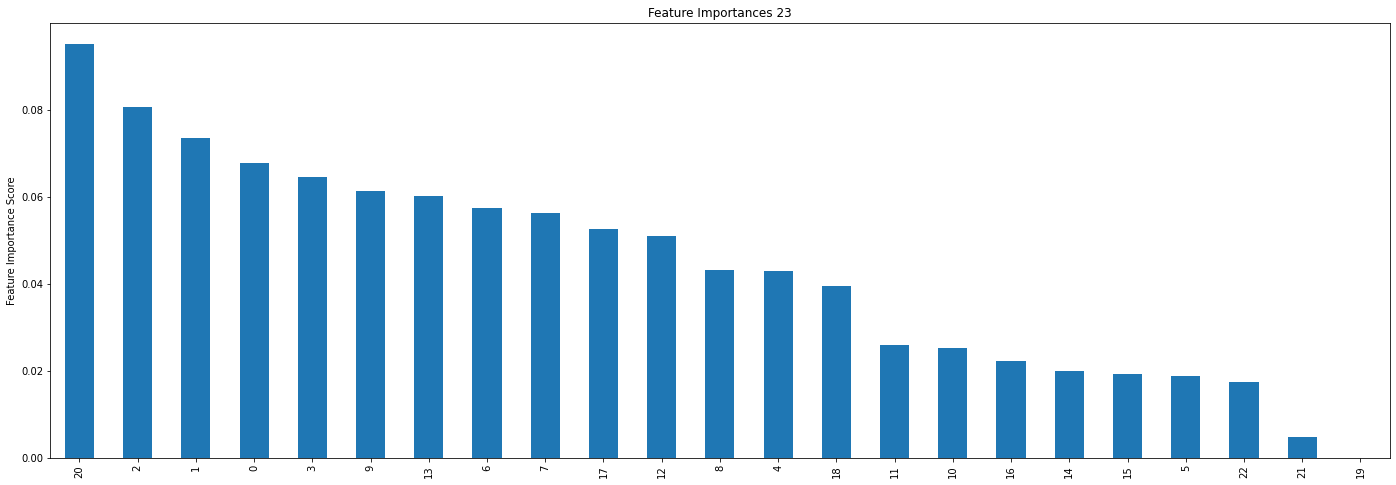

In [ ]:
show_evaluation(pred_val3, valid1_target)
evaluate(model3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   20.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


Default score: -1.2265713578923498
Accuracy is: 0.6021872229895483
F1 is: 0.7517064352390939


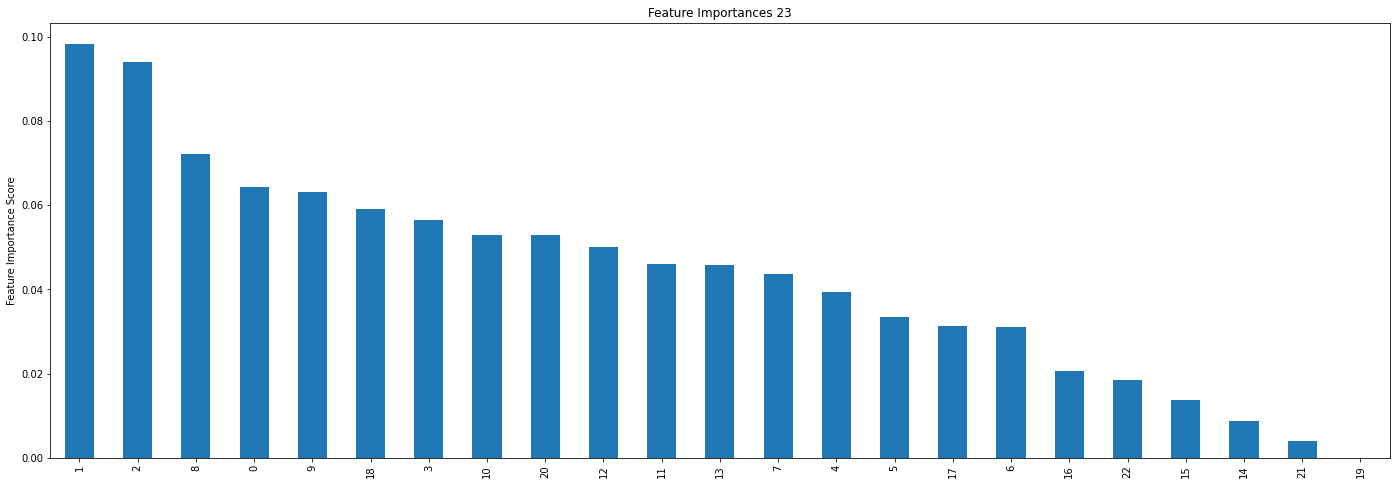

In [ ]:
model4 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model4.fit(train_VIKING, train_VIKING_target)

pred_val4 = model4.predict(valid1)
pred_test4 = model4.predict(valid2)

show_evaluation(pred_val4, valid1_target)
evaluate(model4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


Default score: -1.226607433672102
Accuracy is: 0.6021769156239049
F1 is: 0.7516532868088598


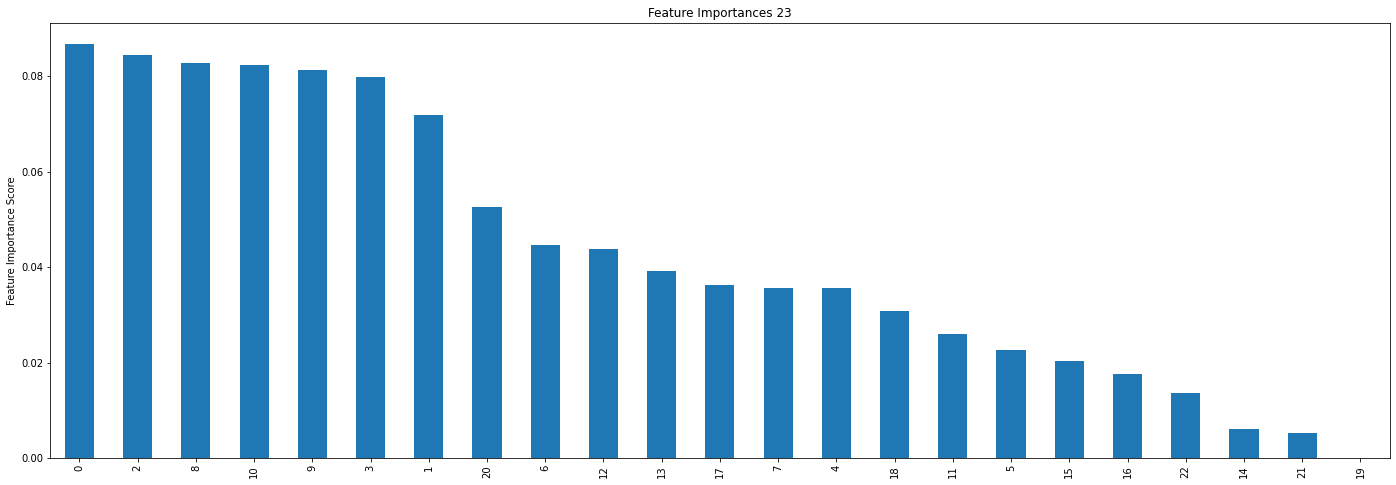

In [ ]:
model5 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model5.fit(train_DUNLIN, train_DUNLIN_target)

pred_val5 = model5.predict(valid1)
pred_test5 = model5.predict(valid2)

show_evaluation(pred_val5, valid1_target)
evaluate(model5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


Default score: -1.2265713578923498
Accuracy is: 0.6021872229895483
F1 is: 0.7517064352390939


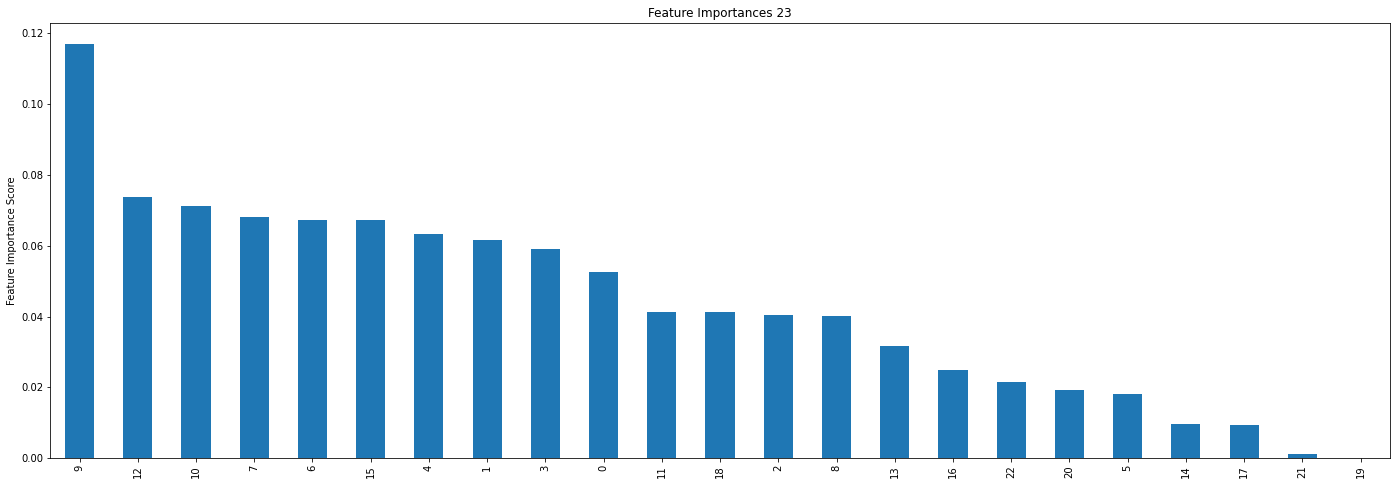

In [ ]:
model6 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model6.fit(train_NORDLAND, train_NORDLAND_target)

pred_val6 = model6.predict(valid1)
pred_test6 = model6.predict(valid2)

show_evaluation(pred_val6, valid1_target)
evaluate(model6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


Default score: -1.1844335587210622
Accuracy is: 0.6201323465748624
F1 is: 0.7517475312136465


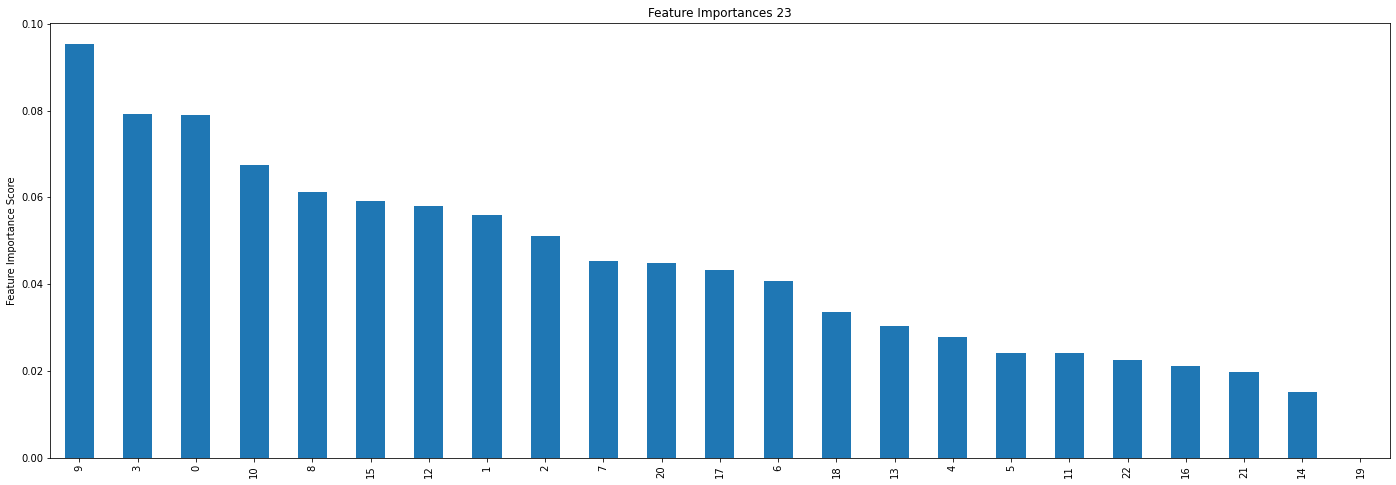

In [ ]:
model7 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model7.fit(train_CROMER, train_CROMER_target)

pred_val7 = model7.predict(valid1)
pred_test7 = model7.predict(valid2)

show_evaluation(pred_val7, valid1_target)
evaluate(model7)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


Default score: -2.2071922220618854
Accuracy is: 0.10597002618070873
F1 is: 0.13713307333598385


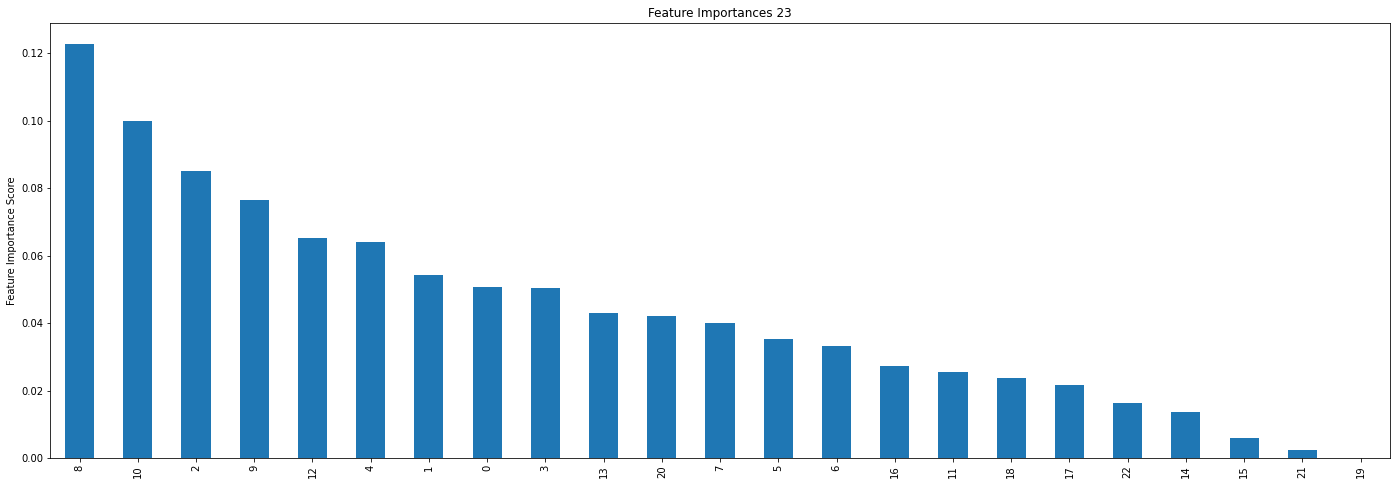

In [ ]:
model8 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model8.fit(train_BAAT, train_BAAT_target)

pred_val8 = model8.predict(valid1)
pred_test8 = model8.predict(valid2)

show_evaluation(pred_val8, valid1_target)
evaluate(model8)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


Default score: -1.3112437898121998
Accuracy is: 0.5779442989960626
F1 is: 0.7083767425207386


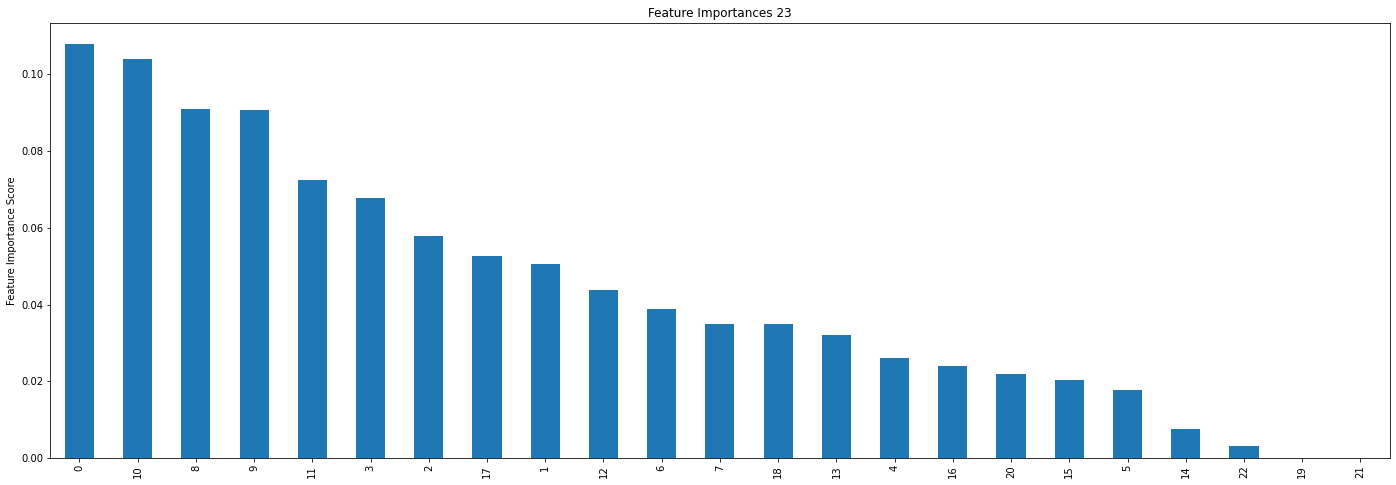

In [ ]:
model9 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model9.fit(train_VESTLAND, train_VESTLAND_target)

pred_val9 = model9.predict(valid1)
pred_test9 = model9.predict(valid2)

show_evaluation(pred_val9, valid1_target)
evaluate(model9)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


Default score: -2.634212208043868
Accuracy is: 0.198519862293595
F1 is: 0.28486466178774994


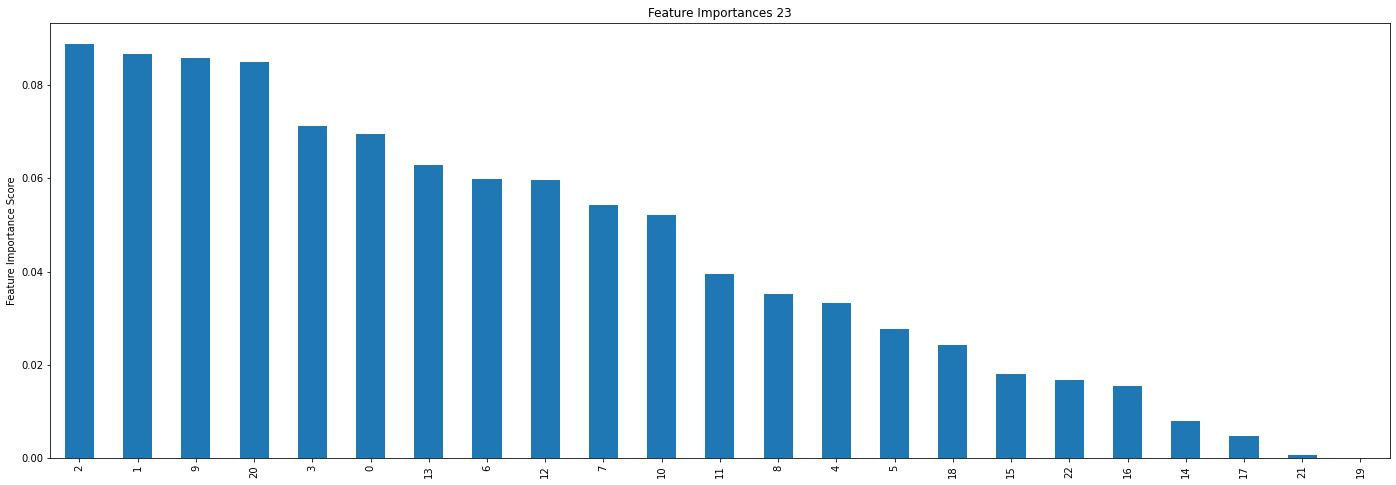

In [ ]:
model10 = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model10.fit(train_HEGRE, train_HEGRE_target)

pred_val10 = model10.predict(valid1)
pred_test10 = model10.predict(valid2)

show_evaluation(pred_val10, valid1_target)
evaluate(model10)

In [ ]:
stack = np.column_stack((pred_val1, pred_val2, pred_val3, pred_val4, pred_val5, pred_val6, pred_val7, pred_val8, pred_val9, pred_val10))
stack_p = np.column_stack((pred_test1, pred_test2, pred_test3, pred_test4, pred_test5, pred_test6, pred_test7, pred_test8, pred_test9, pred_test10))

In [ ]:
valid1_target

0        1
1        1
2        1
3        1
4        1
        ..
97013    0
97014    0
97015    0
97016    0
97017    0
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 97018, dtype: int64

In [ ]:
meta_model1 = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', verbose=2)
from sklearn.linear_model import LogisticRegression
#meta_model1 = LogisticRegression(multi_class='ovr', verbose=2)
meta_model1.fit(stack, valid1_target)
test_predictions = meta_model1.predict(stack_p)

test_predictions, valid2_target

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.2s finished


(array([0, 0, 0, ..., 1, 1, 1]), 0        2
 1        2
 2        2
 3        2
 4        2
         ..
 90263    0
 90264    0
 90265    0
 90266    0
 90267    0
 Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 90268, dtype: int64)

In [ ]:
show_evaluation(test_predictions, valid2_target)

Default score: -3.2324674857092215
Accuracy is: 0.057174192404838925
F1 is: 0.01944782644488694


In [ ]:
show_evaluation(test_predictions, valid2_target)

Default score: -3.2324674857092215
Accuracy is: 0.057174192404838925
F1 is: 0.01944782644488694


In [ ]:
#traindata.drop('FORCE_2020_LITHOFACIES_LITHOLOGY', axis=1, inplace=True)
model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, class_weight='balanced', verbose=2)
model.fit(traindata, lithology)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=2,
                       warm_start=False)

In [ ]:
a = model.predict(valid2)
b = model.predict(valid1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [ ]:
show_evaluation(a, valid2_target)

Default score: -1.5014263083263173
Accuracy is: 0.38993884876146584
F1 is: 0.33935874077912465


In [ ]:
show_evaluation(b, valid1_target)

Default score: -1.5380960234183347
Accuracy is: 0.39811169061411283
F1 is: 0.4020022003767201


In [ ]:
dh

In [ ]:
train_HORD_target = train_HORD_target.map(lithology_numbers)
train_SHET_target = train_SHET_target.map(lithology_numbers)
train_ROGALAND_target = train_ROGALAND_target.map(lithology_numbers)
train_VIKING_target = train_VIKING_target.map(lithology_numbers)
train_DUNLIN_target = train_DUNLIN_target.map(lithology_numbers)
train_NORDLAND_target = train_NORDLAND_target.map(lithology_numbers)
train_CROMER_target = train_CROMER_target.map(lithology_numbers)
train_BAAT_target = train_BAAT_target.map(lithology_numbers)
train_VESTLAND_target = train_VESTLAND_target.map(lithology_numbers)
train_HEGRE_target = train_HEGRE_target.map(lithology_numbers)

In [ ]:
traindata

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORMATION_enc,WELL_enc,GROUP_enc,FORMATION_mean_target,WELL_mean_target,GROUP_mean_target
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,-999.0,20.915468,161.131180,24.612379,-999.0,34.636410,-0.574928,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,-999.0,19.383013,160.603470,23.895531,-999.0,34.636410,-0.570188,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,-999.0,22.591518,160.173615,23.916357,-999.0,34.779556,-0.574245,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,-999.0,32.191910,160.149429,23.793688,-999.0,39.965164,-0.586315,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,-999.0,38.495632,160.128342,24.104078,-999.0,57.483765,-0.597914,65000.0,-999.00000,0.016394,0.097838,-999.000000,-999.0,55542.522470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977665,3169.3124,-999.00000,-999.0,-999.000000,8.423170,-999.0,-999.000000,-999.000000,2.527984,77.654900,-999.0,4.586425,-999.000000,-999.000000,8.5,27.674368,-0.001763,30000.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561
977666,3169.4644,-999.00000,-999.0,-999.000000,8.379244,-999.0,-999.000000,-999.000000,2.537613,75.363937,-999.0,7.019858,-999.000000,-999.000000,8.5,28.024338,-0.007600,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561
977667,3169.6164,-999.00000,-999.0,-999.000000,8.350248,-999.0,-999.000000,-999.000000,2.491860,66.452843,-999.0,9.049782,-999.000000,-999.000000,8.5,28.091282,-0.018297,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561
977668,3169.7684,-999.00000,-999.0,-999.000000,8.313779,-999.0,-999.000000,-999.000000,2.447539,55.784817,-999.0,8.903917,-999.000000,-999.000000,8.5,28.019775,-0.011438,65030.0,0.00035,0.001830,0.021211,43727.973073,-999.0,51473.956561
